In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv("fordgobike-tripdataFor201902.csv")
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183411,271,00:20.6,04:52.1,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No
183412,313,05:34.7,10:48.5,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183413,141,06:05.5,08:27.2,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183414,139,05:34.4,07:54.3,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

In [3]:
cols_to_change =['end_station_name','user_type','start_time','end_time','member_gender','bike_share_for_all_trip','start_station_name']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Dtypes,int64,category,category,float64,category,float64,float64,float64,category,float64,float64,int64,category,float64,category,category
Num_Uniq,4752,35783,35767,329,329,334,335,329,329,335,335,4646,2,75,3,2


In [4]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Null,0.0,0.0,0.0,197.000000,197.000000,0.0,0.0,197.000000,197.000000,0.0,0.0,0.0,0.0,8265.000000,8265.000000,0.0
Null_ratio,0.0,0.0,0.0,0.001074,0.001074,0.0,0.0,0.001074,0.001074,0.0,0.0,0.0,0.0,0.045061,0.045061,0.0


In [5]:
c1="member_birth_year member_gender end_station_name start_station_name".split()
df.dropna(subset=c1,inplace=True)


In [6]:
c2="start_station_id end_station_id".split()
modes=dict(df[c2].mode().iloc[0])

In [7]:
df.fillna(modes, inplace=True)

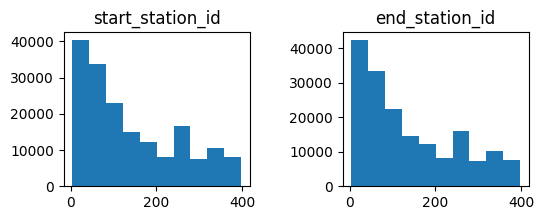

In [8]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("start_station_id")
plt.hist(df["start_station_id"])

plt.subplot(1, 2, 2)
plt.title("end_station_id")
plt.hist(df["end_station_id"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [9]:
c2 = ["start_station_id","end_station_id"]
medians = dict(df[c2].median())
medians

{'start_station_id': np.float64(104.0), 'end_station_id': np.float64(101.0)}

In [10]:
df.fillna(medians, inplace=True)

In [11]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

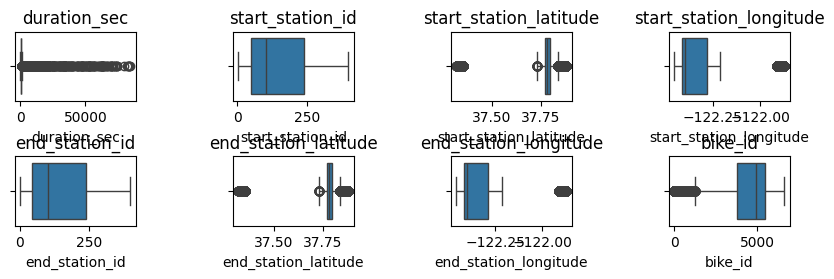

In [13]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [14]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

In [15]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

In [16]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

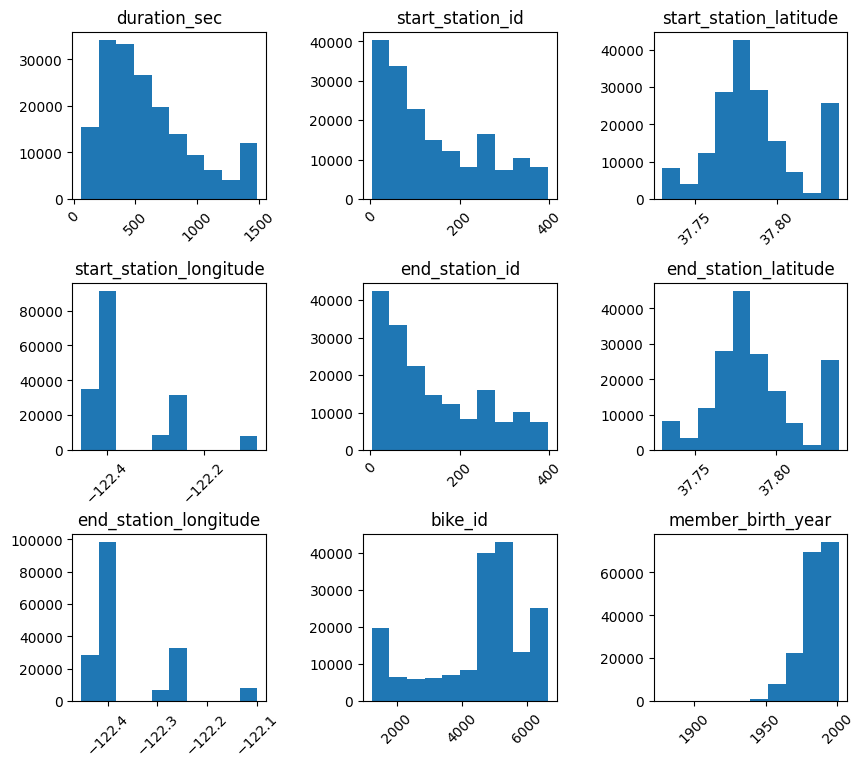

In [17]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [18]:
num_low_var_cols =['start_station_longitude','end_station_longitude']

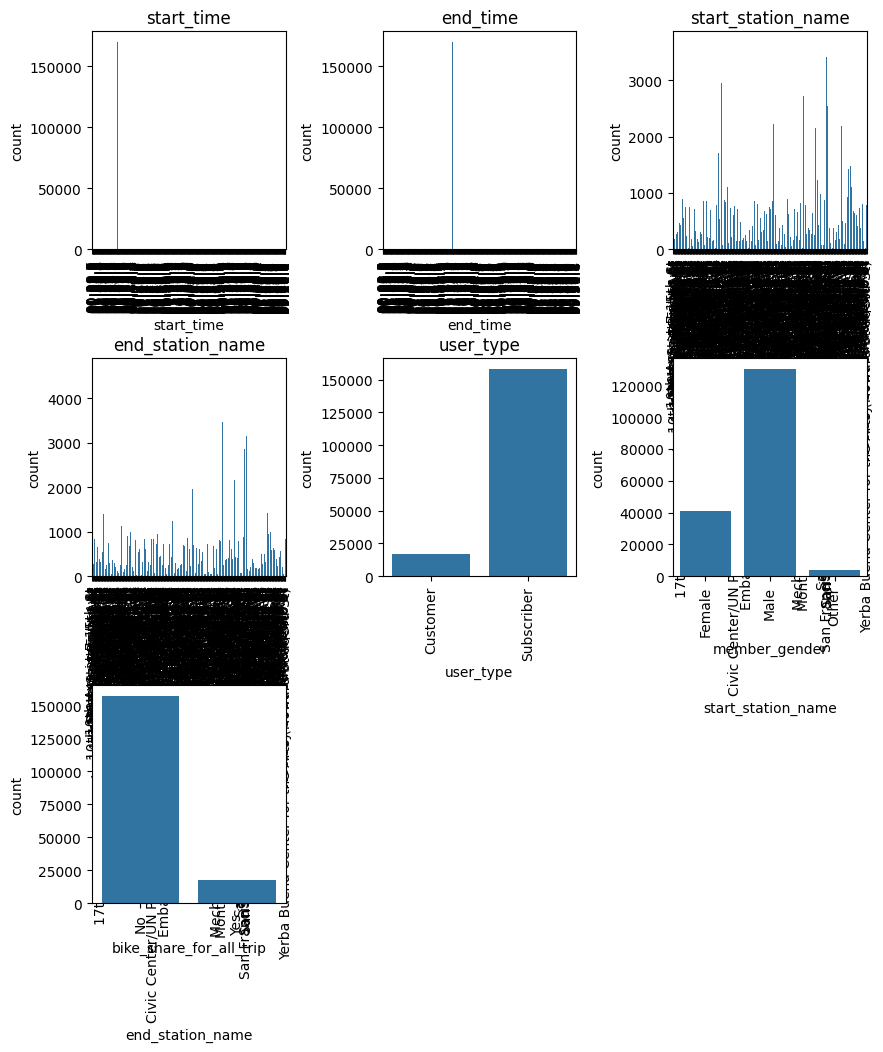

In [19]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [20]:
cat_low_var_cols =['user_type','bike_share_for_all_trip','start_time','end_time']

In [21]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

In [22]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [70]:
X = df.drop("duration_sec",axis=1)
y=df[["duration_sec"]]

In [39]:
pd.DataFrame({"Dtype":X.dtypes,"Num_Uniq":X.nunique()}).T

,start_station_id,start_station_name,start_station_latitude,end_station_id,end_station_name,end_station_latitude,bike_id,member_birth_year,member_gender
Dtype,float64,category,float64,float64,category,float64,int64,float64,category
Num_Uniq,329,323,229,329,323,231,3817,75,3


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
num_cols = X.select_dtypes("number").columns 

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [41]:
pd.DataFrame({"Dtypes": X.dtypes, "Num_Uniq": X.nunique()}).T



,start_station_id,start_station_name,start_station_latitude,end_station_id,end_station_name,end_station_latitude,bike_id,member_birth_year,member_gender
Dtypes,float64,category,float64,float64,category,float64,float64,float64,category
Num_Uniq,329,323,229,329,323,231,3817,75,3


In [ ]:
ordinal_cols=["start_station_name","member_gender","end_station_name"]

In [43]:
nominal_cols=["start_station_id","end_station_id","bike_id"]
one_hot_cols=["start_station_name","member_gender","end_station_name"]

In [67]:
binary_cols=["member_birth_year","start_station_id","end_station_id","bike_id"]

In [59]:
df["end_station_name"].unique()

['Commercial St at Montgomery St', 'Powell St BART Station (Market St at 4th St)', 'Central Ave at Fell St', '10th Ave at E 15th St', 'Broadway at Kearny', ..., 'Mission St at 1st St', 'San Pedro St at Hedding St', 'Oak St at 1st St', '26th Ave at International Blvd', '2nd St at Folsom St']
Length: 323
Categories (323, object): ['10th Ave at E 15th St', '10th St at Fallon St', '10th St at University Ave', '11th St at Bryant St', ..., 'Williams Ave at 3rd St', 'Williams Ave at Apollo St', 'Woolsey St at Sacramento St', 'Yerba Buena Center for the Arts (Howard St at...]

In [60]:
lables={
   "start_station_name":{"Montgomery St BART Station (Market St at 2nd St)":0,"Market St at Dolores St":1,"Grove St at Masonic Ave":2,"Frank H Ogawa Plaza":3,"4th St at Mission Bay Blvd S":4,"Market St at 10th St":5,"Washington St at Kearny St":6,"Post St at Kearny St":7,"Jones St at Post St":8,"Civic Center/UN Plaza BART Station (Market St ...":9,"Valencia St at 21st St":10,"Bancroft Way at College Ave":11,"Howard St at Mary St":12,"22nd St at Dolores St":13,"Laguna St at Hayes St":14,"5th St at Folsom":15,"Telegraph Ave at 23rd St":16,"Page St at Scott St":17,"Lake Merritt BART Station":18},
   "member_gender":{"Female":0,"Male":1,"Other":2},
   "end_station_name":{"San Francisco Caltrain Station 2  (Townsend St at 4th St)":0,"Market St at 10th St":1,"Montgomery St BART Station (Market St at 2nd St)":2,"San Francisco Ferry Building (Harry Bridges Plaza)":3,"San Francisco Caltrain (Townsend St at 4th St)":4,"26th Ave at International Blvd":5,"Backesto Park (Jackson St at 13th St)":6,"Commercial St at Montgomery St":7}
   }

In [61]:
for col in ordinal_cols:
    X[col] = X[col].map(lables[col])

In [62]:
from category_encoders import OneHotEncoder

In [64]:
onehot_encoder = OneHotEncoder(cols=one_hot_cols)
X = onehot_encoder.fit_transform(X)

In [65]:
from category_encoders import BinaryEncoder

In [68]:
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [69]:
X

,start_station_id_0,start_station_id_1,start_station_id_2,start_station_id_3,start_station_id_4,start_station_id_5,start_station_id_6,start_station_id_7,start_station_id_8,start_station_name_1,...,member_birth_year_0,member_birth_year_1,member_birth_year_2,member_birth_year_3,member_birth_year_4,member_birth_year_5,member_birth_year_6,member_gender_1,member_gender_2,member_gender_3
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
183408,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
183409,0,1,1,1,1,1,1,0,1,0,...,0,0,0,1,0,1,1,1,0,0
183410,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,1,0,0
